# M2P12 Classification Project
--------

**The objective of the M2P12 Classification Project is to to create a model to predict whether or not a customer will churn.**

**The material applied from Module 2 will be the following:**
1. Feature Engineering and Data Preprocessing
2. Logistic Regression
3. K Nearest Neighbours (KNN)
4. Decision Trees and Random Forests

**M2P12 Classification Project has the following conditions:**
1. Project must include EDA section.
2. Project must include visualization.
3. Data must be cleaned and prepared.
4. Use Feature Engineering, if applicable.
5. Must compare at minimum 3 classification models.
6. Provide validation scheme (simple or cross-validation).
7. Explain which feature(s) are chosen for final model.
8. Use final model to make new predictions based on my provided input.

**The outline for the project will be the following:**

**The project will be split into five parts:**
1. Part 1 will involve EDA, Visualization, Data Cleaning, Encoding, Data Preparation (ex: Split to X and y).  <br>
2. Part 2 will be working with Model #1: Logistic Regression. <br>
3. Part 3 will be working with Model #2: K Nearest Neighbours (KNN). <br>
4. Part 4 will be working with Model #3: Random Forest (Classifier). <br>
5. Part 5 will be determining which of the three models has the best performance and having the best performing model be our final model. <br>
   The final model will be used to make a prediction and includes some final comments/conclusion. <br>

#### Part 1: EDA, Visualization, Data Cleaning, Encoding, Data Preparation (ex: Split to X and y) 

In [221]:
#1.1 Import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
#1.2 Load data

churn_df = pd.read_excel("../M2P12-Classification_Project-main/churn.xlsx")
churn_df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [223]:
# 1.3 EDA and Visualization

# 1.3.1 EDA here

# Note: I commented out (added #) for some lines of code so it won't take space in the output. 
# If you want to see the output, remove the # before "print" in each line.

# Data exploration:

# View descriptive statistics of the numerical columns.
#print(churn_df.describe())


# View a summary of the dataset including data types, number of non-null entries and memory usage. 
print(churn_df.info())

# View missing values in the dataset.
print(churn_df.isnull().sum())

# View data types of each column.
print(churn_df.dtypes)


# View the unique values in a column
#print(churn_df['City'].unique())

# View the count of unique values in each column
#print(churn_df.nunique())


# Comments:
# 'Churn Reason' has 5174 missing values.
# 'Total Charges' is an object.'Total Charges' will need to be converted to be numeric (int, float). Encoding will not be used on 'Total Charges'.
# The other features which are objects will either be removed or will be converted to be numeric. (int, float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

**Observations from EDA:**
- 'Churn Reason' has 5174 missing values. (This feature was dropped later).
- 'Total Charges' is an object. 'Total Charges' will need to be converted to be numeric (int, float). 'Total Charges' already has numerical data, however they are considered to be objects/strings. When converting to numerical, encoding will not be used for 'Total Charges'.   
- The other features which are objects will either be removed or will be converted to be numeric (int, float). 

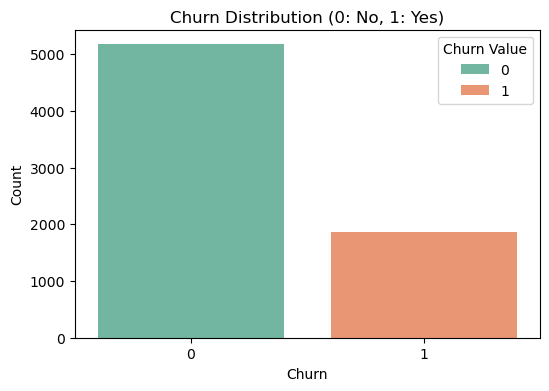

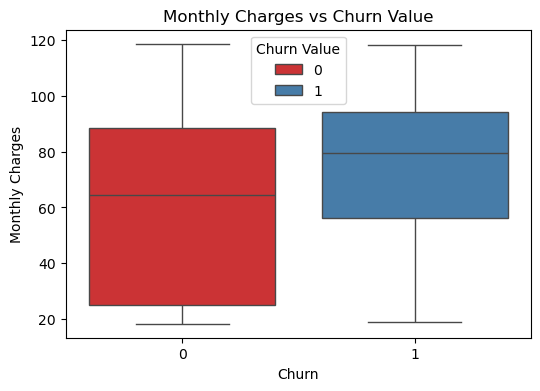

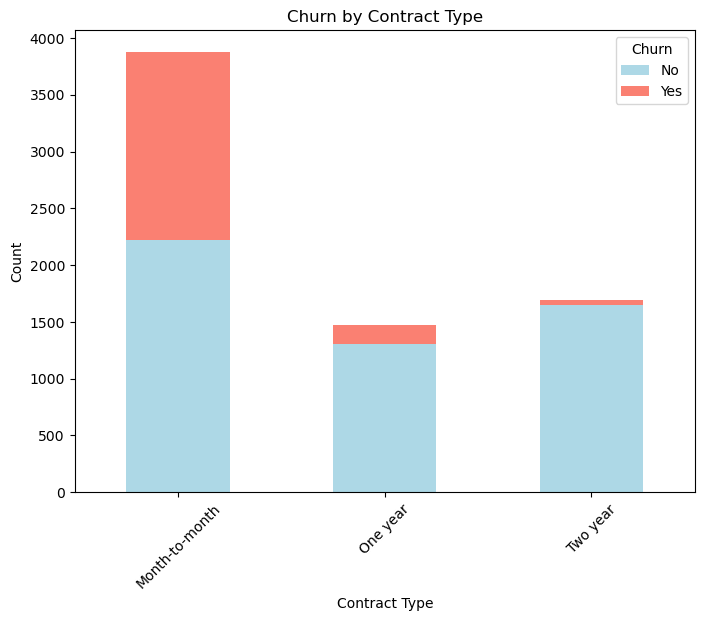

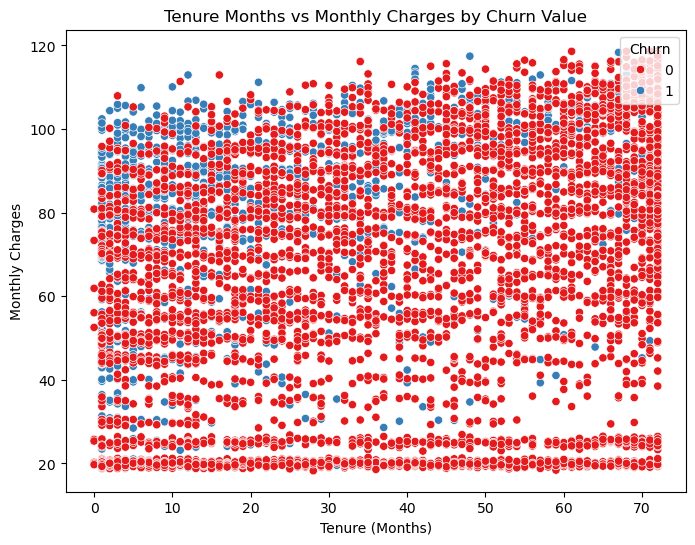

In [225]:
# 1.3.2 Visualization

import seaborn as sns
import matplotlib.pyplot as plt

#--------------Count Bar Plot for Churn Distribution------------------------------------------------

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn Value', data=churn_df, hue = 'Churn Value', palette='Set2')
plt.title('Churn Distribution (0: No, 1: Yes)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Churn Value: 0 = No, 1 = Yes

#-----------Box Plot for Monthly Charges vs Churn Value----------------------------------------------

plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn Value', y='Monthly Charges', hue = 'Churn Value', data=churn_df, palette='Set1')
plt.title('Monthly Charges vs Churn Value')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Churn Value: 0 = No, 1 = Yes

#-----------Stacked Bar Plot for Churn by Contract Type------------------------------------------

contract_churn = churn_df.groupby(['Contract', 'Churn Value']).size().unstack()
contract_churn = contract_churn.fillna(0)

contract_churn.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(8, 6))
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Churn Value: 0 = No, 1 = Yes

#----------Scatter Plot for Tenure Months vs Monthly Charges with Churn Value as hue-------

# Scatter Plot for Tenure Months vs Monthly Charges with Churn Value as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tenure Months', y='Monthly Charges', hue='Churn Value', data=churn_df, palette='Set1')
plt.title('Tenure Months vs Monthly Charges by Churn Value')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Churn Value: 0 = No, 1 = Yes


**Observations from Visualization:**
- More occurrences of Churn at higher Monthly Charges.
- More occurrences of Churn with the 'Month-to-month' Contract Type.
- More occurrences of Churn (compared to No Churn) seen at lower Tenure (Months) and higher Monthly Charges.    

In [227]:
# 1.4 Dataframe clean up: fill missing values, Remove features which are not useful.

# Will use "cleaned_churn_df" as updated dataframe.

# 1.4.a) Removing 'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Value', 
# 'Churn Score', 'Churn Reason'.

# Dropping features with unique values for every row/customer ('CustomerID', 'Count', etc.): they don't provide any meaningful information 
# about customer behavior or characteristics.
# Dropping features related to location ('State', 'Lat Long', etc.): all customer are within the same country and state (United States, California), 
# there would have little to no variance, which would contribute little to predicting churn. 
# Dropping Churn Value: (already in Churn Label, which will be encoded)
# Dropping Churn Score: (likely derived or unnecessary, too closely related to Churn Label as target variable)
# Dropping Churn Reason: (text-based column, not usable for training models as there could be too many catergories and sparse data)
cleaned_churn_df = churn_df.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 
                                          'Lat Long', 'Latitude', 'Longitude', 'Churn Value', 'Churn Score', 'Churn Reason'])

# View missing values in the dataset.
print(cleaned_churn_df.isnull().sum())

# View data types of each column.
print(cleaned_churn_df.dtypes)

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
CLTV                 0
dtype: int64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Cha

**Dropping Unnecessary Features:** <br>
- Dropping features with unique values for every row/customer ('CustomerID', 'Count', etc.): they don't provide any meaningful information about customer behavior or characteristics. <br>
- Dropping features related to location ('State', 'Lat Long', etc.): all customers are within the same country and state (United States, California), there would have little to no variance, which would contribute little to predicting churn. <br> 
- Dropping Churn Value: This is already in Churn Label, which will be encoded. <br>
- Dropping Churn Score: This feature is likely derived or unnecessary, and is too closely related to Churn Label as target variable. <br>
- Dropping Churn Reason: This is a text-based column, not usable for training models as there could be too many catergories and sparse data. <br>


In [229]:
# 1.5 Converting objects/strings to numerical, and Encoding Categorical Columns

# Convert categorical columns to numerical

# Note: Total Charges has dtype "object" but they are strings of numerical values, use to_numerical and errors='coerce'
# Note:'Total Charges' is not using encoding to convert from objects/strings to numerical.

# Handle non-numeric values in 'Total Charges' column and convert it to numeric
cleaned_churn_df['Total Charges'] = pd.to_numeric(cleaned_churn_df['Total Charges'], errors='coerce')

# errors='coerce', If ‘coerce’, then invalid parsing will be set as NaN.

# Note: 'Total Charges' got 11 missing values after being converted to numeric. 
# Will fill the missing values with the median.
cleaned_churn_df['Total Charges'] = cleaned_churn_df['Total Charges'].fillna(cleaned_churn_df['Total Charges'].median())

#(Seperation)-------------------------Label Encoding on columns with binary choices------------------------------------------------

# For all columns with binary choices (Male or Female, Yes or No to 0 and 1), will use Label Encoding.

# Columns with binary choices are the following:
# 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 
# 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Churn Label'

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of binary columns
binary_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
                  'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 
                  'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Churn Label']

# Apply LabelEncoder to each binary column
for col in binary_columns:
    cleaned_churn_df[col] = label_encoder.fit_transform(cleaned_churn_df[col])


#(Seperation)--------------One Hot Encoding on columns with multiple choices (greater than 2 choices)---------------------------------

# Importing OneHotEncoder.
from sklearn.preprocessing import OneHotEncoder

# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)

# Fit and Transform features with OneHotEncoder.
encoded_cols = encoder.fit_transform(cleaned_churn_df[['Internet Service', 'Contract', 'Payment Method']])

# Get new feature names of the newly generated features (columns) after encoding. (ex: Internet Service_Fiber optic, Contract_One year, etc.) 
encoded_sel_col_cleaned_churn_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['Internet Service', 'Contract', 'Payment Method']))

encoded_sel_col_cleaned_churn_df

# Drop/remove original feature names, and replace them with new generated feature names after encoding with OneHotEncoder. 
cleaned_churn_df = cleaned_churn_df.drop(columns=['Internet Service', 'Contract', 'Payment Method']).join(encoded_sel_col_cleaned_churn_df)

#(Seperation)------------------------cleaned_churn_df.dtypes------------------------------------------------ 

print(cleaned_churn_df.dtypes)

# Every column is numeric now (int64, float64, int32) 

Gender                                      int32
Senior Citizen                              int32
Partner                                     int32
Dependents                                  int32
Tenure Months                               int64
Phone Service                               int32
Multiple Lines                              int32
Online Security                             int32
Online Backup                               int32
Device Protection                           int32
Tech Support                                int32
Streaming TV                                int32
Streaming Movies                            int32
Paperless Billing                           int32
Monthly Charges                           float64
Total Charges                             float64
Churn Label                                 int32
CLTV                                        int64
Internet Service_Fiber optic              float64
Internet Service_No                       float64


**Reasoning for encoding data for Classification models:** <br>
Classification models require numerical data (as input) to understand patterns to provide a predictive output. <br>

**Converting features to numerical data, and Encoders used:**
- 'Total Charges' feature has dtype "object" but they are strings of numerical values. This feature was converted to have numerical values. Note that 'Total Charges' is not using encoding to convert from object/string to numerical.  <br>
- Label Encoding on features with binary choices/values.(ex: Male or Female, Yes or No to 0 and 1). Used for its simplicity and efficiency. <br>
- One Hot Encoding on features with multiple choices/values (greater than 2 choices). Label Encoding may lead the algorithm to believing that multiple values could be ordinal values (there is ranking). One Hot Encoding would prevent misinterpretation of ordinal relationships. <br>   

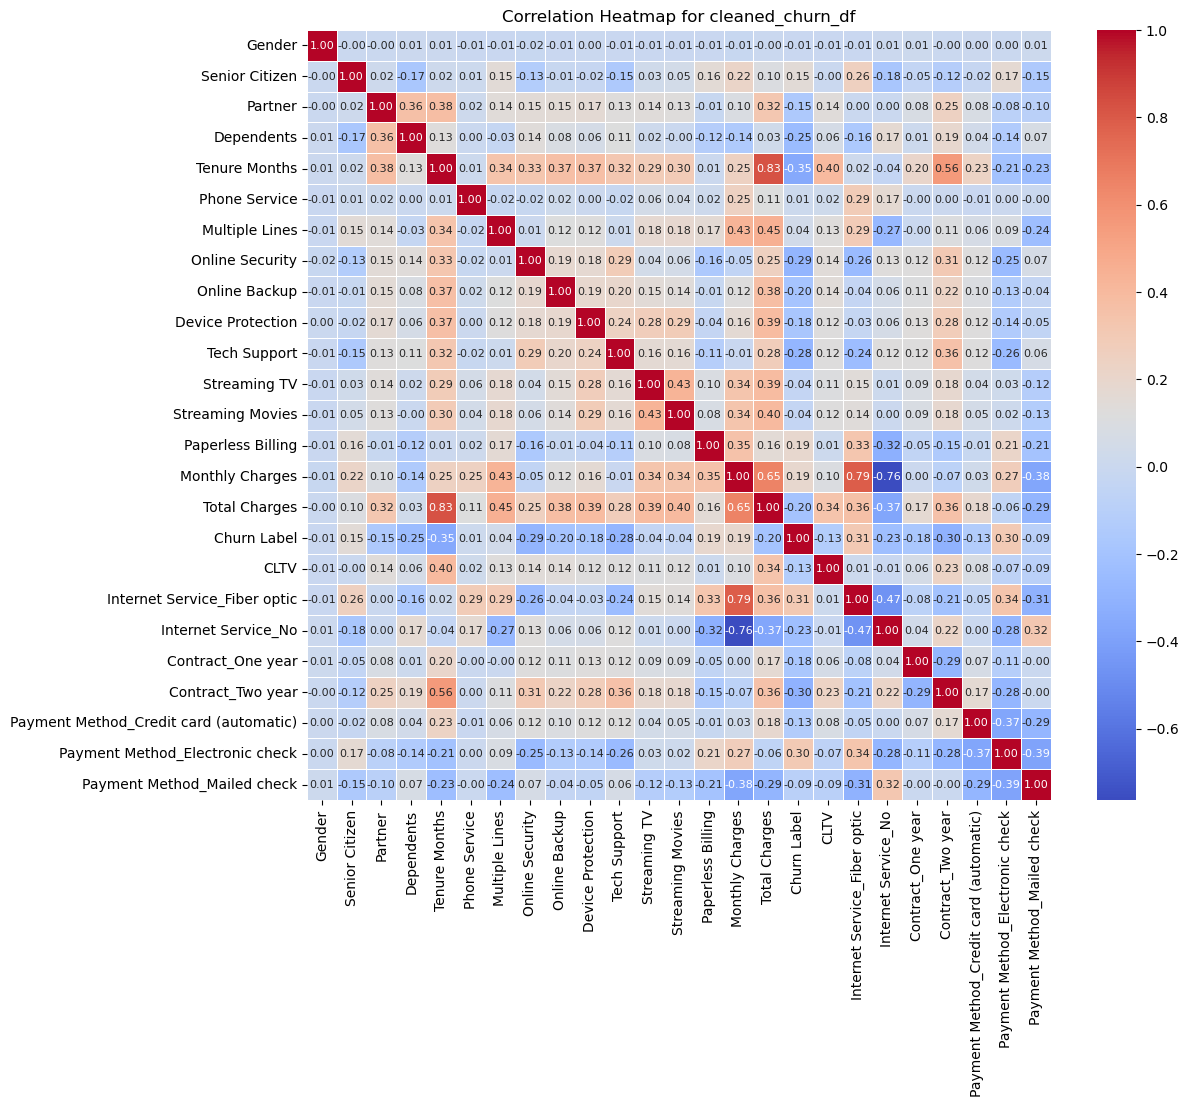

In [231]:
# 1.6 Correlation 

# 1.6.1 Correlation with Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = cleaned_churn_df.corr()

# Create heatmap for the correlation matrix
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, annot_kws={"size": 8})  # Adjust font size of the numbers inside the boxes

# Title for Heatmap
plt.title('Correlation Heatmap for cleaned_churn_df')

# Display heatmap
plt.show()

In [232]:
# 1.6.2 Top 20 correlations with Churn Label

# Correlation values with respect to 'Churn Label'
churn_label_correlation = correlation_matrix['Churn Label']

# Sort the correlations by absolute value, and get the top 20
top_20_churn_label_correlation = churn_label_correlation.abs().sort_values(ascending=False).head(20)

# Display the top 20 correlations with 'Churn Label'
print(top_20_churn_label_correlation)

Churn Label                               1.000000
Tenure Months                             0.352229
Internet Service_Fiber optic              0.308020
Contract_Two year                         0.302253
Payment Method_Electronic check           0.301919
Online Security                           0.289309
Tech Support                              0.282492
Dependents                                0.248542
Internet Service_No                       0.227890
Total Charges                             0.199037
Online Backup                             0.195525
Monthly Charges                           0.193356
Paperless Billing                         0.191825
Device Protection                         0.178134
Contract_One year                         0.177820
Senior Citizen                            0.150889
Partner                                   0.150448
Payment Method_Credit card (automatic)    0.134302
CLTV                                      0.127463
Payment Method_Mailed check    

In [233]:
# 1.7 Prepare Data, Split to X and y

# 'Churn Label' will be target variable, y. 

# Separate X and y
X = cleaned_churn_df.drop('Churn Label',axis=1)
y = cleaned_churn_df['Churn Label']


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

#(Separation)-------------------------------------Features chosen for X----------------------------------------------------
# Features chosen are the following:

# Gender                                        
# Senior Citizen                               
# Partner                                 
# Dependents                                  
# Tenure Months                              
# Phone Service                              
# Multiple Lines                               
# Online Security                              
# Online Backup                               
# Device Protection                           
# Tech Support                                
# Streaming TV                                
# Streaming Movies                            
# Paperless Billing                          
# Monthly Charges                       
# Total Charges                                                        
# CLTV                                                                                      
# Internet Service_Fiber optic                
# Internet Service_No                         
# Contract_One year                         
# Contract_Two year                           
# Payment Method_Credit card (automatic)     
# Payment Method_Electronic check             
# Payment Method_Mailed check 


# Features chosen: 
# Gender, Senior Citizen, Partner, Dependents, Tenure Months, Phone Service, Multiple Lines, Online Security, 
# Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Paperless Billing, Monthly Charges, Total Charges, 
# CLTV, Internet Service_Fiber optic, Internet Service_No, Contract_One year, Contract_Two year, Payment Method_Credit card (automatic), 
# Payment Method_Electronic check, Payment Method_Mailed check


# Reasoning:
# Features which deal with demographics, performance, service, plans, offerings/benefits, 
# payments and time duration were chosen as they could influence churn.

X shape: (7043, 24)
y shape: (7043,)


**Features chosen are the following:**

- Gender <br>                                      
- Senior Citizen <br>                                
- Partner <br>                                  
- Dependents <br>                                   
- Tenure Months <br>                               
- Phone Service <br>                               
- Multiple Lines <br>                                
- Online Security <br>                               
- Online Backup <br>                                
- Device Protection <br>                            
- Tech Support <br>                                 
- Streaming TV <br>                                 
- Streaming Movies <br>                             
- Paperless Billing <br>                           
- Monthly Charges <br>                        
- Total Charges  <br>                                                        
- CLTV <br>                                                                                       
- Internet Service_Fiber optic <br>                 
- Internet Service_No <br>                          
- Contract_One year <br>                          
- Contract_Two year <br>                           
- Payment Method_Credit card (automatic) <br>      
- Payment Method_Electronic check <br>              
- Payment Method_Mailed check <br>  

**Chosen Features Reasoning:**
- Features which deal with demographics, performance, service, plans, offerings/benefits, payments and time duration were chosen as they could influence churn.

#### Part 2: Model 1, Logistic Regression

In [236]:
# 2 Logistic Regression

# 2.1 Logistic Regression: Split the data into training-testing data

from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): {X_OTHER.shape}, {y_OTHER.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
print(f"Validation set shape (X_val, y_val): {X_val.shape}, {y_val.shape}")

# Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.


Training set shape (X_train, y_train): (4930, 24), (4930,)
OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): (2113, 24), (2113,)
Testing set shape (X_test, y_test): (1057, 24), (1057,)
Validation set shape (X_val, y_val): (1056, 24), (1056,)


Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

In [238]:
# Q2.2 Logistic Regression: Scale Data

from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"Scaled training set shape: {scaled_X_train.shape}")
print(f"Scaled testing set shape: {scaled_X_test.shape}")
print(f"Scaled testing set shape: {scaled_X_val.shape}")

Scaled training set shape: (4930, 24)
Scaled testing set shape: (1057, 24)
Scaled testing set shape: (1056, 24)


**Why Logistic Regression should have scaled data:**

Logistic Regression should have scaled data because it uses optimization methods to find the best solution, and if features are on different scales, it can slow down the process. <br>
Scaling the data would make sure all features are treated equally, helping the model converge faster and work more effectively. <br>

In [240]:
# Q2.2.a) Logistic Regression: Create Bad Model

from sklearn.linear_model import LogisticRegression

bad_log_model = LogisticRegression(solver='saga',max_iter=5000)

bad_log_model.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=5000, solver='saga')

In [241]:
# Q2.2.b) Logistic Regression: Evaluate Bad Model based on the validation data

y_test_pred = bad_log_model.predict(scaled_X_test)

from sklearn.metrics import classification_report

# Generating the classification report
bad_class_report1 = classification_report(y_test, y_test_pred, target_names=['No Churn', 'Churn'])
print("Classification report for the bad Logistic Regression model.")
print(bad_class_report1)

# Classification report for bad Logistic Regression model.

Classification report for the bad Logistic Regression model.
              precision    recall  f1-score   support

    No Churn       0.85      0.90      0.87       792
       Churn       0.62      0.51      0.56       265

    accuracy                           0.80      1057
   macro avg       0.74      0.70      0.72      1057
weighted avg       0.79      0.80      0.79      1057



In [242]:
# 2.3 Logistic Regression: Create and Train Model. Cross Validation with GridSearchCV.

# From M2P08 Logistic Regression - Lecture 2, 3. GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',max_iter=5000)


# GridSearch for Best Hyper-Parameters
# Main parameter choices are regularization penalty choice and regularization C value.

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'penalty': ['l2'],  
    'solver': ['saga', 'liblinear', 'newton-cg'],  
    'max_iter': [5000],        
}


grid_model = GridSearchCV(log_model,param_grid=param_grid, verbose=1)
grid_model.fit(scaled_X_train,y_train)               # Don't forget, it's "scaled_X_train", not "X_train"!!


# Note: Long load time running GridSearchCV.

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'max_iter': [5000],
                         'penalty': ['l2'],
                         'solver': ['saga', 'liblinear', 'newton-cg']},
             verbose=1)

In [243]:
# 2.4 Logistic Regression: Model Parameters (ex: C value), fit best model, Cross-Validation results.

grid_model.best_params_


print(f"Best C value: {grid_model.best_params_['C']}")
print(f"Best Penalty: {grid_model.best_params_['penalty']}")
print(f"Best solver: {grid_model.best_params_['solver']}")
print(f"Best max iterations: {grid_model.best_params_['max_iter']}")


#Seperation---------------Fit best model--------------------------

# Make log model based off of the grid model's best estimator.
log_model = grid_model.best_estimator_

# Note: The grid_model.best_estimator_ will use the best parameters found by grid_model.best_params_ during the GridSearchCV process.
# So log_model = grid_model.best_estimator_ will have best parameters as per grid_model.best_params_.

Best C value: 10
Best Penalty: l2
Best solver: saga
Best max iterations: 5000


**Logistic Regression: Cross-validation (from GridSearchCV) results:**

View parameters as per "grid_model.best_params_" mentioned above. <br>

In [245]:
# 2.5 Logistic Regression: Evaluation: Confusion Matrix and Classification report

# 2.5.a) Logistic Regression: y_pred array

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix

y_pred = log_model.predict(scaled_X_test)         # Don't forget, it's "scaled_X_test", not "X_test"!!

y_pred

array([0, 1, 0, ..., 0, 0, 0])

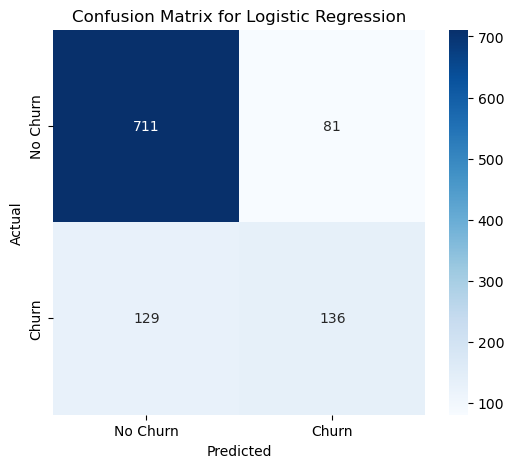

In [246]:
# 2.5.b) Logistic Regression: Confusion Matrix

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [247]:
# 2.5.c) Logistic Regression: Classification report

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Classification Report

from sklearn.metrics import classification_report

# Generating the classification report
class_report1 = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print("Classification report for the optimized Logistic Regression model.")
print(class_report1)

# From classification report:
# No Churn (customers stayed/didn't leave).
# Churn (customers who left).

# - If the precision for class 'No Churn' is high, that means when the model predicts a customer will stay, it is often correct.
# - If the recall for class 'No Churn' is low, that means the model is missing many customers who actually stayed, and falsely 
#   predicting that they will churn.
# - If the precision for class 'Churn' is high, that means when the model predicts a customer will churn, it is often correct.
# - If the recall for class 1 'Churn' is low, that means the model is missing many customers who actually churned.

# Classification report of the optimized model (with GridsearchCV) found below.

Classification report for the optimized Logistic Regression model.
              precision    recall  f1-score   support

    No Churn       0.85      0.90      0.87       792
       Churn       0.63      0.51      0.56       265

    accuracy                           0.80      1057
   macro avg       0.74      0.71      0.72      1057
weighted avg       0.79      0.80      0.79      1057



Note: The classification report from the optimized model (with GridsearchCV) is very similar when compared to the bad model for Logistic Regression. 

#### Part 3: Model 2, K Nearest Neighbours (KNN)

In [250]:
# 3. K Nearest Neighbours (KNN)

# 3.1 K Nearest Neighbours (KNN): Split the data into training-testing data

from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): {X_OTHER.shape}, {y_OTHER.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
print(f"Validation set shape (X_val, y_val): {X_val.shape}, {y_val.shape}")

#Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.


Training set shape (X_train, y_train): (4930, 24), (4930,)
OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): (2113, 24), (2113,)
Testing set shape (X_test, y_test): (1057, 24), (1057,)
Validation set shape (X_val, y_val): (1056, 24), (1056,)


Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

In [252]:
# Q3.2 K Nearest Neighbours (KNN): Scale Data

from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"Scaled training set shape: {scaled_X_train.shape}")
print(f"Scaled testing set shape: {scaled_X_test.shape}")
print(f"Scaled testing set shape: {scaled_X_val.shape}")

Scaled training set shape: (4930, 24)
Scaled testing set shape: (1057, 24)
Scaled testing set shape: (1056, 24)


**Why KNN should have scaled data:**

KNN should have scaled data because it relies on measuring the distance between data points. If the features are on different scales, the algorithm will give more importance to features with larger values, leading to inaccurate predictions. <br>
Scaling makes sure all features contribute equally to the distance calculation. <br>

In [254]:
# Q3.2.a) K Nearest Neighbours (KNN): Create Bad Model

from sklearn.neighbors import KNeighborsClassifier

bad_knn_model = KNeighborsClassifier()

bad_knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [255]:
# Q2.2.b) K Nearest Neighbours (KNN): Evaluate Bad Model based on the validation data

y_test_pred = bad_knn_model.predict(scaled_X_test)

from sklearn.metrics import classification_report

# Generating the classification report
bad_class_report2 = classification_report(y_test, y_test_pred, target_names=['No Churn', 'Churn'])
print("Classification report for the bad KNN model.")
print(bad_class_report2)

Classification report for the bad KNN model.
              precision    recall  f1-score   support

    No Churn       0.82      0.83      0.83       792
       Churn       0.48      0.47      0.48       265

    accuracy                           0.74      1057
   macro avg       0.65      0.65      0.65      1057
weighted avg       0.74      0.74      0.74      1057



In [256]:
# 3.3 K Nearest Neighbours (KNN): Create KNN model. Cross-Validation with GridSearchCV. 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],       
    'weights': ['uniform', 'distance'],    
    'metric': ['euclidean', 'manhattan'],  
}

# weights: 
# ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
# ‘distance’ : weight points by the inverse of their distance. in this case, closer 
#              neighbors of a query point will have a greater influence than neighbors which are further away.

# metric:
# 'euclidean': Computes the Euclidean distance between two 1-D arrays.
# 'manhattan': also known as L1 norm or city block distance, is the distance between two points measured along axes at right angles. 

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(scaled_X_train, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


**K Nearest Neighbours (KNN): Cross-Validation (with GridSearchCV) results:**

Best hyperparameters:
- 'metric': 'manhattan'
- 'n_neighbors': 11
- 'weights': 'uniform'

In [258]:
# 3.4 K Nearest Neighbours (KNN): Fit best model

knn_model = grid_search.best_estimator_
knn_model

# Note: The grid_model.best_estimator_ will use the best parameters found by grid_model.best_params_ during the GridSearchCV process.
# So knn_model = grid_model.best_estimator_ will have {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}.

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [259]:
# 3.5 K Nearest Neighbours (KNN): Evaluation: Confusion Matrix and Classification report

# 3.5.a) K Nearest Neighbours (KNN): y_pred array

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix

y_pred = knn_model.predict(scaled_X_test)         # Don't forget, it's "scaled_X_test", not "X_test"!!

y_pred

array([1, 1, 0, ..., 0, 0, 0])

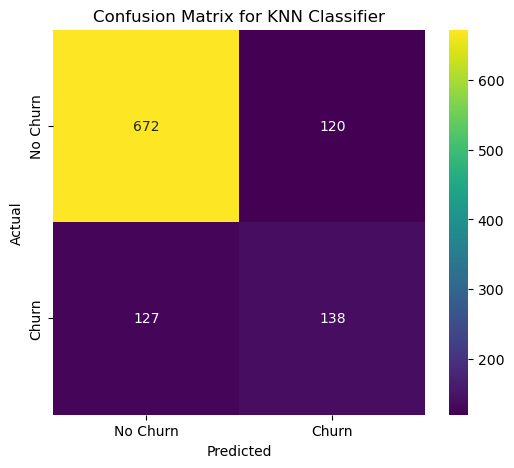

In [260]:
# 3.5.b) K Nearest Neighbours (KNN): Confusion Matrix

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap with a different colormap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [261]:
# 3.5.c) K Nearest Neighbours (KNN): Classification report

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Classification Report

from sklearn.metrics import classification_report

# Generating the classification report
class_report2 = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print("Classification report for the optimized KNN model.")
print(class_report2)

# From classification report:
# No Churn (customers stayed/didn't leave).
# Churn (customers who left).

# - If the precision for class 'No Churn' is high, that means when the model predicts a customer will stay, it is often correct.
# - If the recall for class 'No Churn' is low, that means the model is missing many customers who actually stayed, and falsely 
#   predicting that they will churn.
# - If the precision for class 'Churn' is high, that means when the model predicts a customer will churn, it is often correct.
# - If the recall for class 1 'Churn' is low, that means the model is missing many customers who actually churned.

Classification report for the optimized KNN model.
              precision    recall  f1-score   support

    No Churn       0.84      0.85      0.84       792
       Churn       0.53      0.52      0.53       265

    accuracy                           0.77      1057
   macro avg       0.69      0.68      0.69      1057
weighted avg       0.76      0.77      0.77      1057



Note: The classification report for the optimized KNN model (with GridsearchCV) has better metrics when compared to the classification report of the bad KNN model.

#### Part 4: Model 3, Random Forest Classification

In [264]:
# 4. Random Forest Classification

# 4.1 Random Forest Classification: Split the data into training-testing data

from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): {X_OTHER.shape}, {y_OTHER.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
print(f"Validation set shape (X_val, y_val): {X_val.shape}, {y_val.shape}")


# Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

#(Separation)--------------------Random Forest Classification not requiring scaling-------------------------------
# Random Forest does not require data to be scaled because it builds decision trees that split data based on feature thresholds, 
# which are not affected by the scale of the features.

Training set shape (X_train, y_train): (4930, 24), (4930,)
OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): (2113, 24), (2113,)
Testing set shape (X_test, y_test): (1057, 24), (1057,)
Validation set shape (X_val, y_val): (1056, 24), (1056,)


Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

**Random Forest Classification not requiring scaling:** <br>

Random Forest does not require data to be scaled because it builds decision trees that split data based on feature values, which are not affected by the scale of the features. <br>
Each tree in the forest makes decisions by comparing values of individual features, so the model is not sensitive to the scale of the features. <br>
Random Forest can handle features with different scales without affecting the model's performance. <br>

In [267]:
# 4.1.a) Random Forest Classification: Create Bad Model

from sklearn.ensemble import RandomForestClassifier

bad_rfc_model = RandomForestClassifier(random_state=1)

bad_rfc_model.fit(X_train, y_train)       # Remember, no "scaled_X_train", no scaled data.

RandomForestClassifier(random_state=1)

In [268]:
# 4.1.b) Random Forest Classification: Evaluate Bad Model based on the validation data

y_test_pred = bad_rfc_model.predict(X_test)    # Remember, no "scaled_X_train", no scaled data.

from sklearn.metrics import classification_report

# Generating the classification report
bad_class_report3 = classification_report(y_test, y_test_pred, target_names=['No Churn', 'Churn'])
print("Classification report for the bad Random Forest model.")
print(bad_class_report3)


Classification report for the bad Random Forest model.
              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86       792
       Churn       0.57      0.44      0.50       265

    accuracy                           0.78      1057
   macro avg       0.70      0.67      0.68      1057
weighted avg       0.76      0.78      0.77      1057



In [269]:
# 4.2 Random Forest Classification: Create model. Cross-Validation with GridSearchCV. 

# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create instance of model with default values
# "rfc" for Random Forest Classification
rfc = RandomForestClassifier(random_state=1)

# Parameter grid for Random Forest
# See link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees in the forest.
    'max_depth': [None, 10, 20],          # Maximum depth of the tree.
    'min_samples_split': [2, 5],          # Minimum number of samples required to split a node.    
}

# Initialize GridSearchCV (and Random Forest) fit GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Note: Long load time.

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


**Random Forest Classification: Cross-Validation (with GridSearchCV) results:**

Best parameters:
- 'max_depth': 10
- 'min_samples_split': 2
- 'n_estimators': 50

In [271]:
# 4.3 Random Forest Classification: Fit best model

rfc_model = grid_search.best_estimator_
rfc_model

# Note: The grid_model.best_estimator_ will use the best parameters found by grid_model.best_params_ during the GridSearchCV process.

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [272]:
# 4.4 Random Forest Classification: Evaluation: Confusion Matrix and Classification report

# 4.4.a) Random Forest Classification: y_pred array

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix

y_pred = rfc_model.predict(X_test)         # Don't forget, there is no "scaled_X_test", it is "X_test"!!
                                           # No scaling required for Random Forest.
y_pred

array([0, 1, 0, ..., 0, 0, 0])

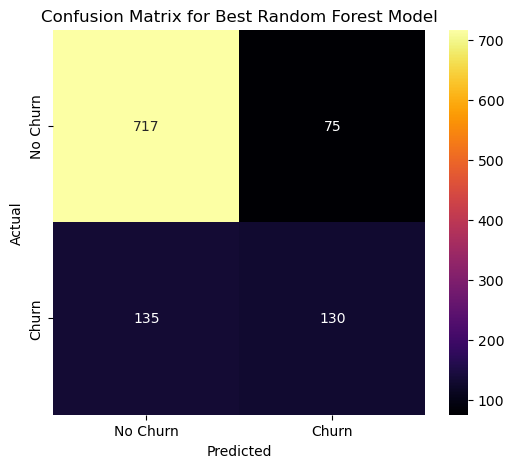

In [273]:
# 4.4.b) Random Forest Classification: Confusion Matrix

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='inferno', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for Best Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [274]:
# 4.4.c) Random Forest Classification: Classification report

# From M2P08 Logistic Regression - Lecture 1, 5. Classification Metrics, Classification Report

from sklearn.metrics import classification_report

# Generating the classification report
class_report3 = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print("Classification report for the optimized Random Forest model.")
print(class_report3)

# From classification report:
# No Churn (customers stayed/didn't leave).
# Churn (customers who left).

# - If the precision for class 'No Churn' is high, that means when the model predicts a customer will stay, it is often correct.
# - If the recall for class 'No Churn' is low, that means the model is missing many customers who actually stayed, and falsely 
#   predicting that they will churn.
# - If the precision for class 'Churn' is high, that means when the model predicts a customer will churn, it is often correct.
# - If the recall for class 1 'Churn' is low, that means the model is missing many customers who actually churned.

Classification report for the optimized Random Forest model.
              precision    recall  f1-score   support

    No Churn       0.84      0.91      0.87       792
       Churn       0.63      0.49      0.55       265

    accuracy                           0.80      1057
   macro avg       0.74      0.70      0.71      1057
weighted avg       0.79      0.80      0.79      1057



**Note:** <br> 
- The classification report for the optimized Random Forest model (with GridsearchCV) has better metrics when compared to the classification report of the bad Random Forest model. <br>


#### Part 5: Final Model

In [277]:
#5 Final model

#5.1 Final model: Comparing classification reports with Logistic Regression Model, KNN Model and Random Forest Model.

# Classification report for Logistic Regression Model is class_report1.
# Classification report for KNN Model is class_report2.
# Classification report for Random Forest Model is class_report3.

#print(class_report1)
#print(class_report2)
#print(class_report3)

# Define the classification report values for each model

import pandas as pd

# Logistic Regression (class_report1)
class_report1_dict = {
    'Model': 'Logistic Regression',
    'No Churn Precision': 0.85,
    'No Churn Recall': 0.90,
    'No Churn F1-Score': 0.87,
    'Churn Precision': 0.63,
    'Churn Recall': 0.51,
    'Churn F1-Score': 0.56,
    'Accuracy': 0.80,
    'Macro Avg Precision': 0.74,
    'Macro Avg Recall': 0.71,
    'Macro Avg F1-Score': 0.72,
    'Weighted Avg Precision': 0.79,
    'Weighted Avg Recall': 0.80,
    'Weighted Avg F1-Score': 0.79,
}

# KNN (class_report2)
class_report2_dict = {
    'Model': 'KNN',
    'No Churn Precision': 0.84,
    'No Churn Recall': 0.85,
    'No Churn F1-Score': 0.84,
    'Churn Precision': 0.53,
    'Churn Recall': 0.52,
    'Churn F1-Score': 0.53,
    'Accuracy': 0.77,
    'Macro Avg Precision': 0.69,
    'Macro Avg Recall': 0.68,
    'Macro Avg F1-Score': 0.69,
    'Weighted Avg Precision': 0.76,
    'Weighted Avg Recall': 0.77,
    'Weighted Avg F1-Score': 0.77,
}

# Random Forest (class_report3)
class_report3_dict = {
    'Model': 'Random Forest',
    'No Churn Precision': 0.84,
    'No Churn Recall': 0.91,
    'No Churn F1-Score': 0.87,
    'Churn Precision': 0.63,
    'Churn Recall': 0.49,
    'Churn F1-Score': 0.55,
    'Accuracy': 0.80,
    'Macro Avg Precision': 0.74,
    'Macro Avg Recall': 0.70,
    'Macro Avg F1-Score': 0.71,
    'Weighted Avg Precision': 0.79,
    'Weighted Avg Recall': 0.80,
    'Weighted Avg F1-Score': 0.79,
}

# Create the DataFrame
df_class_reports = pd.DataFrame([class_report1_dict, class_report2_dict, class_report3_dict])

# Display the DataFrame
#print(df_class_reports)
df_class_reports

# From classification report:
# "No Churn" (customers stayed/didn't leave).
# "Churn" (customers who left).



#(Seperation)---------------------Classification report definitions-----------------------------------------------------------

# Precision:
# Precision measures the proportion of true positive predictions (correctly predicted positive cases) out of all the 
# instances that the model predicted as positive.
# High precision means that when the model predicts positive, it is very likely to be correct.
# Precision = True Positives/(True Positives + False Positives)

# Recall:
# Recall measures the proportion of true positive predictions out of all the actual positive instances in the 
# dataset (the number of actual positives the model managed to identify).
# High recall means the model is good at identifying positive instances, but it may also classify some negative instances as positive.
# Recall = True Positives/(True Positives + False Negatives)

# F1-score:
# The F1-score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, especially 
# when one is more important than the other. The F1-score is useful when you need a single metric to evaluate the performance, 
# particularly in imbalanced classes.
# A high F1-score indicates that the model has both high precision and high recall, meaning it does well in both identifying positive cases 
# and not misclassifying negatives as positives.
# F1-score = 2*[(Precision*Recall)/(Precision+Recall)]

# Accuracy:
# Accuracy is the proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model.
# Accuracy = (True Positives + True Negatives)/(Total Number of Instances)



,Model,No Churn Precision,No Churn Recall,No Churn F1-Score,Churn Precision,Churn Recall,Churn F1-Score,Accuracy,Macro Avg Precision,Macro Avg Recall,Macro Avg F1-Score,Weighted Avg Precision,Weighted Avg Recall,Weighted Avg F1-Score
0,Logistic Regression,0.85,0.90,0.87,0.63,0.51,0.56,0.80,0.74,0.71,0.72,0.79,0.80,0.79
1,KNN,0.84,0.85,0.84,0.53,0.52,0.53,0.77,0.69,0.68,0.69,0.76,0.77,0.77
2,Random Forest,0.84,0.91,0.87,0.63,0.49,0.55,0.80,0.74,0.70,0.71,0.79,0.80,0.79


**Logistic Regression is the overall best model** as it has the highest Churn F1-Score, as well as a good balance between Churn Precision, Churn Recall and Accuracy. 

**Logistic Regression will be chosen as the final model.**

In [279]:
#5.1.a) Final model: Evaluation and classification report with holdout data

# Logistic Regression chosen as the final model.
final_model = log_model

# Using holdout data
y_val_pred = final_model.predict(scaled_X_val)

from sklearn.metrics import classification_report

# Generating the classification report of final model with holdout data
holdout_class_report = classification_report(y_val, y_val_pred, target_names=['No Churn', 'Churn'])
print("Classification report for the final model for holdout data.")
print(holdout_class_report)

Classification report for the final model for holdout data.
              precision    recall  f1-score   support

    No Churn       0.88      0.88      0.88       783
       Churn       0.64      0.64      0.64       273

    accuracy                           0.82      1056
   macro avg       0.76      0.76      0.76      1056
weighted avg       0.82      0.82      0.82      1056



In [280]:
#5.1.b) Final model: Comparing classification report results for Logistic Regression: test data against holdout data

import pandas as pd

# Logistic Regression (class_report1)
class_report1_dict = {
    'Model': 'Logistic Regression (Testing)',
    'No Churn Precision': 0.85,
    'No Churn Recall': 0.90,
    'No Churn F1-Score': 0.87,
    'Churn Precision': 0.63,
    'Churn Recall': 0.51,
    'Churn F1-Score': 0.56,
    'Accuracy': 0.80,
    'Macro Avg Precision': 0.74,
    'Macro Avg Recall': 0.71,
    'Macro Avg F1-Score': 0.72,
    'Weighted Avg Precision': 0.79,
    'Weighted Avg Recall': 0.80,
    'Weighted Avg F1-Score': 0.79,
}

# Holdout Logistic Regression (holdout_class_report)
holdout_class_report_dict = {
    'Model': 'Logistic Regression (Holdout)',
    'No Churn Precision': 0.88,
    'No Churn Recall': 0.88,
    'No Churn F1-Score': 0.88,
    'Churn Precision': 0.64,
    'Churn Recall': 0.64,
    'Churn F1-Score': 0.64,
    'Accuracy': 0.82,
    'Macro Avg Precision': 0.76,
    'Macro Avg Recall': 0.76,
    'Macro Avg F1-Score': 0.76,
    'Weighted Avg Precision': 0.82,
    'Weighted Avg Recall': 0.82,
    'Weighted Avg F1-Score': 0.82,
}

# Create the DataFrame
df_class_reports2 = pd.DataFrame([class_report1_dict, holdout_class_report_dict])

# Display the DataFrame
#print(df_class_reports2)
df_class_reports2

# The classification report results of the testing data for Logistic Regression is similar to the classification report results of 
# the holdout data for Logistic Regression, with the exception of Churn Recall and Churn F1-Score.

,Model,No Churn Precision,No Churn Recall,No Churn F1-Score,Churn Precision,Churn Recall,Churn F1-Score,Accuracy,Macro Avg Precision,Macro Avg Recall,Macro Avg F1-Score,Weighted Avg Precision,Weighted Avg Recall,Weighted Avg F1-Score
0,Logistic Regression (Testing),0.85,0.90,0.87,0.63,0.51,0.56,0.80,0.74,0.71,0.72,0.79,0.80,0.79
1,Logistic Regression (Holdout),0.88,0.88,0.88,0.64,0.64,0.64,0.82,0.76,0.76,0.76,0.82,0.82,0.82


**Results of Cross-validation (with GridsearchCV):** <br>
- With Cross-validation (with GridsearchCV), the classification report results of the testing data for Logistic Regression is similar to the classification report results of the holdout data for Logistic Regression, with the exception of Churn Recall and Churn F1-Score.
- A few reasons with the difference in Churn Recall and Churn F1-Score could be due to overfitting, data distribution differences (holdout data might have had more cases where the customer did churn) and sampling/split variability (holdout data might have a more representative set of churn cases where the test data did not.)  

In [282]:
#5.2 Final model: Fit Final Model

# Fitting X and y with 100% of the data.
final_model.fit(X, y)

LogisticRegression(C=10, max_iter=5000, solver='saga')

In [283]:
#5.3 Final model: Prediction

import pandas as pd
from sklearn.preprocessing import StandardScaler

#X_train.iloc[0:1]
# From X_train.iloc[0:1], (one row of data from X_train, 'Gender' and 'Senior Citizen' were 0). 
# For the prediction/experimentation, 'Gender' and 'Senior Citizen' will be change to 1 (for some variety), and this data will be used to 
# make the prediction.
# The data (new_data) used for the prediction is an altered X_train.iloc[0:1] (first row of X_train), but with 'Gender' and 
# 'Senior Citizen' changed to 1. 

new_data = {
    'Gender': [1],                               # 'Gender' changed to 1.
    'Senior Citizen': [1],                       # 'Senior Citizen' 0 changed to 1.
    'Partner': [0],
    'Dependents': [0],
    'Tenure Months': [37],
    'Phone Service': [1],
    'Multiple Lines': [2],
    'Online Security': [0],
    'Online Backup': [2],
    'Device Protection': [2],
    'Tech Support': [0],                        
    'Streaming TV': [0],                         
    'Streaming Movies': [2],                     
    'Paperless Billing': [1],
    'Monthly Charges': [101.90],
    'Total Charges': [3545.35],
    'CLTV': [4437],
    'Internet Service_Fiber optic': [1],
    'Internet Service_No': [0],
    'Contract_One year': [0],
    'Contract_Two year': [0],
    'Payment Method_Credit card (automatic)': [0],
    'Payment Method_Electronic check': [0],
    'Payment Method_Mailed check': [0]
}



#TypeError: float() argument must be a string or a real number, not 'dict': does not run in 'prediction' below.
# Need to convert new_data (dictionary) into a data frame.

new_data_df = pd.DataFrame(new_data)

# Note: Logistic Regression should have scaling.

# Scale the new data (using StandardScaler, should be same scaler used in training)
scaled_new_data = scaler.transform(new_data_df)

# UserWarning: X does not have valid feature names, but Logistic Regression was fitted with feature names
# warnings.warn(
# Convert the scaled data back into a DataFrame and assign correct column names
scaled_new_data_df = pd.DataFrame(scaled_new_data, columns=X.columns)

prediction = final_model.predict(scaled_new_data_df)

print("Predict if No Churn (0) or Churn (1):", prediction)

# Result:
# From new_data as input, the Logistic Regression Model was able to provide a prediction of No Churn (0) or Churn (1).

Predict if No Churn (0) or Churn (1): [1]


**Result of Prediction:**

From new_data (data frame) as input, the Logistic Regression Model was able to provide a prediction of No Churn (0) or Churn (1).

## Conclusion 
In conclusion, three models were tested: Logistic Regression, K Nearest Neighbours (KNN) and Random Forest (Classifier). <br>
**Of the three models, the Logistic Regression model had the best performance as it has the highest Churn F1-Score, as well as a good balance between Churn Precision, Churn Recall and Accuracy.** <br>

- For chosen features (applied to final model, Logistic Regression): features which deal with demographics, performance, service, plans, offerings/benefits, payments and time duration were chosen as they could influence churn. <br>
- Cross-validation (with GridSearchCV) was used for all three models. The reason is so we could evaluate the best parameters in a similar method before choosing final model. Cross-validation was used to evaluate the holdout data, and has (somewhat) similar results/metrics with the test data.<br>
- All three classification models required the data to be converted into numerical format hence the use of encoding. For features with binary values, LabelEncoder was used for encoding. For features with three or more values, OneHotEncoder was used. <br>   
- With what was stated above, the final model (Logistic Regression) had the encoding feature LabelEncoder for features with binary values and OneHotEncoder for features with three or more values. These encoders were applied as part of feature engineering for the final model (Logistic Regression). <br>  
- Continuing with feature engineering, scaling was applied on the data for the final model (Logistic Regression), as it makes it more efficient. <br>
- As per prediction experimentation, with "new_data (data frame)" as input, the Logistic Regression Model was able to provide a prediction of No Churn (0) or Churn (1). <br>

### End